In [1]:
%cd ~/Dropbox/Stanford/CS_224N/Final_Project

/Users/elissali/Dropbox/Stanford/CS_224N/Final_Project


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

sns.set(color_codes=True)

In [3]:
data_df = pd.read_csv('./data_2.csv', sep=',')
means_df = pd.read_csv('./sentence_means_var.csv', sep=',')
annotated_df = pd.read_csv('./hand_annotated.csv', sep=',')
distrib_df = pd.read_csv('./datasets/seed_0/test_db.csv', sep=',')


def func(tgrep):
    if tgrep[-3:] == ':00':
        return tgrep[:-3]
    else: return tgrep
annotated_df['tgrep.id'] = annotated_df['tgrep.id'].apply(func)
means_df['tgrep.id'] = means_df['tgrep.id'].apply(func)

In [4]:
distrib_df[0:6]

,Item,Mean,Var,Alpha,Beta,Params,Raw_Distrib,Discrete_Distrib,Sentence
0,164352:51,0.546667,0.119333,0.492825,0.362092,(0.4928251755022261 0.3620915386852378),[0.33 0.84 0.86 0.76 0.99 0.31 0.74 0.0...,[0.11111111 0. 0.22222222 0. 0...,i think in some cases it doesn't matter if it...
1,173504:75,0.666667,0.104422,0.304365,0.169157,(0.30436478242287335 0.1691570683290402),[0.21 1.0 0.86 0.69 0.9 0.13 0.91 0.95 ...,[0.11111111 0.11111111 0.11111111 0. 0...,and if you don't you'll perish. either by the ...
2,112347:54,0.566842,0.110874,0.531796,0.351648,(0.5317960082250381 0.35164841970003324),[0.53 0.73 0.09 0.89 0.88 0.64 0.75 0.1...,[0.26315789 0. 0.05263158 0.10526316 0...,"now, my kids didn't like it because they just ..."
3,113966:144,0.451111,0.082143,1.172429,0.863586,(1.1724290563691957 0.8635857726442795),[0.37 0.43 0.35 0.86 0.7 0.02 0.36 0.1 ...,[0.22222222 0. 0.33333333 0.11111111 0...,and finally our governor at the time which who...
4,155785:58,0.508889,0.066721,0.345911,0.222104,(0.34591075051904796 0.22210411312128392),[0.66 0.73 0.53 0.72 0.83 0.63 0.16 0.1...,[0.11111111 0.22222222 0. 0.11111111 0...,and we seem to be able to get along with the...
5,9072:53:00,0.404444,0.118825,0.251853,0.401979,(0.25185309059299565 0.4019789085496089),[0.18 0.02 0.34 0.77 0.03 0.32 0.92 0.1...,[0.22222222 0.22222222 0.22222222 0. 0...,"well, i was just going to say, it's a little ..."


## example 1

In [4]:
x = distrib_df['Raw_Distrib'][0]
x

'[0.33  0.84  0.86  0.76  0.99  0.31  0.74  0.0  0.09]'

[0.33 0.84 0.86 0.76 0.99 0.31 0.74 0.   0.09]


(array([2., 0., 0., 2., 0., 0., 0., 2., 2., 1.]),
 array([0.        , 0.099     , 0.198     , 0.297     , 0.396     ,
        0.495     , 0.594     , 0.693     , 0.792     , 0.89100003,
        0.99      ], dtype=float32),
 <a list of 10 Patch objects>)

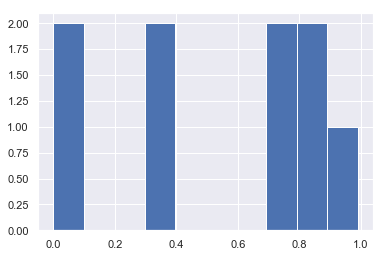

In [5]:
x = distrib_df['Raw_Distrib'][0]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)
print(list_x)
plt.hist(list_x)

This is the actual distribution of ratings for sentence with `tgrep.id = 164352:51`.

In [6]:
a, b = stats.beta.fit(list_x)[0:2]
print(a,b)

0.5863107870724427 0.33767697261504037


In [7]:
n=0
a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

0.4928251755022261 0.3620915386852378
----
tgrep id:  164352:51


Now I calculate the alpha/beta params for the beta distribution fitted over this sample of data points. Notice I need to do the 0.0000001 thing because floc and fscale basically set the range for the distribution but they're exclusive... and it's possible we get 0 or 1 ratings, so I need to make sure those extreme ratings are included within the range.

Basically, `floc` is the minimum bound (x can't be less than `floc`) and then `fscale` + `floc` is the upper bound (x can't be higher than `fscale` + `floc`). Like, if `floc = 0.5` and `fscale = 2`, then x has to be bounded by `(0.5, 2.5)`.

So for my purposes, I think the super tiny random values I chose (like the 0.00000001) are okay.

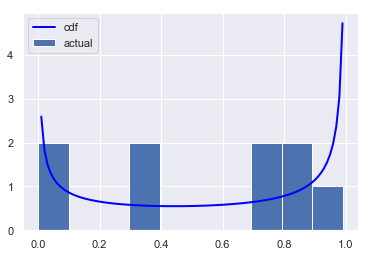

In [8]:
def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = stats.beta.cdf(x, a, b, mu, sigma)
    else:
        y = stats.beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)
x = np.linspace(0, 1, 100)

plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', lw=2, ls='-', label='cdf')
plt.legend();

## example 2

In [9]:
n = 1
x = distrib_df['Raw_Distrib'][n]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)
# plt.hist(list_x)

This is the actual distribution of ratings for sentence with `tgrep.id = 173504:75`.

In [10]:
a, b = stats.beta.fit(list_x)[0:2]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

0.31683355587750256 0.16626723141584215
----
tgrep id:  173504:75


In [11]:
a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)

0.3043647824228733 0.1691570683290402


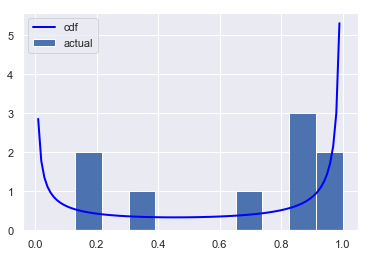

In [12]:
x = np.linspace(0, 1, 100)
plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', lw=2, ls='-', label='cdf')
plt.legend();

## example 3

In [13]:
n = 2
x = distrib_df['Raw_Distrib'][n]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)

a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

0.5317960082250381 0.35164841970003324
----
tgrep id:  112347:54


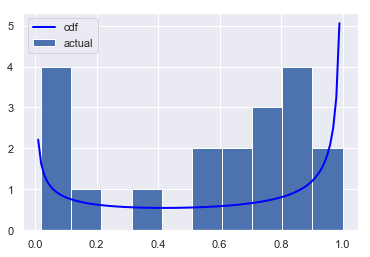

In [14]:
x = np.linspace(0, 1, 100)
plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', lw=2, ls='-', label='cdf')
plt.legend();

## example 4

In [24]:
n = 3
x = distrib_df['Raw_Distrib'][n]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)

a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

1.1724290563691957 0.8635857726442795
----
tgrep id:  113966:144


In [25]:
list_x

array([0.37, 0.43, 0.35, 0.86, 0.7 , 0.02, 0.36, 0.1 , 0.87],
      dtype=float32)

This is the actual and predicted distribution of ratings for sentence with `tgrep.id = 113966:144`.

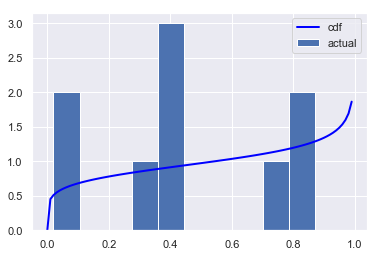

In [16]:
x = np.linspace(0, 1, 100)
plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', lw=2, ls='-', label='cdf')
plt.legend();

## example 5

In [17]:
n = 4
x = distrib_df['Raw_Distrib'][n]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)

a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

0.345910750519048 0.22210411312128392
----
tgrep id:  155785:58


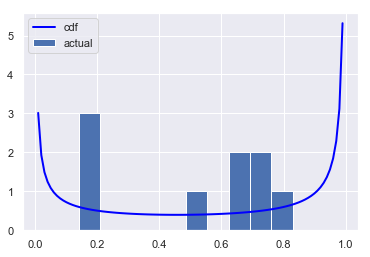

In [18]:
x = np.linspace(0, 1, 100)
plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', lw=2, ls='-', label='cdf')
plt.legend();

## example 6

In [19]:
n = 5
x = distrib_df['Raw_Distrib'][n]
x = x.strip(']')
x = x.strip('[')
x = x.split()
list_x = np.array(x, dtype=np.float32)

a = distrib_df['Alpha'][n]
b = distrib_df['Beta'][n]
print(a,b)
print("----")
print("tgrep id: ", distrib_df['Item'][n])

0.25185309059299565 0.4019789085496089
----
tgrep id:  9072:53:00


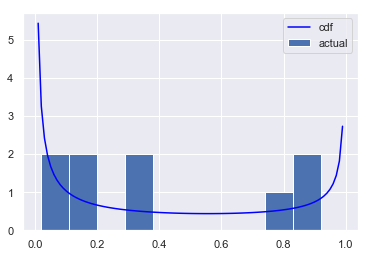

In [20]:
x = np.linspace(0, 1, 100)
plt.hist(list_x, label='actual')
plot_beta(x, a, b, color='blue', label='cdf')
plt.legend();